In [2]:
#Importing Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading files
sample_read = pd.read_csv(r"D:\Sales_Data\Sales_April_2019.csv")
sample_read1 = pd.read_csv(r"D:\Sales_Data\Sales_August_2019.csv")

In [4]:
sample_read.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
sample_read1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


##### Merge 12 months of sales data into a single csv file 

In [8]:
#List all files in the same path
Total_files =[file for file in os.listdir("D:\Sales_Data")]

In [9]:
Total_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [12]:
#Combining all the files data into a single file
path = "D:\Sales_Data"

#blank dataframe
all_files = pd.DataFrame()

for file in Total_files:
    current_df = pd.read_csv(path+"/"+file)
    all_files = pd.concat([all_files, current_df])
    
all_files.shape

(186850, 6)

##### convert it into dataset

In [13]:
all_files.to_csv('D:\Sales_Data/all_files.csv',index=False)

##### Data cleaning and formatting

In [15]:
all_files.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [17]:
#Checking for total duplicates
all_files.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [18]:
#Dropping all duplicates
all_files = all_files.dropna()
all_files.shape

(186305, 6)

##### What is the best month for sale?

In [19]:
def month(x):
    return x.split('/')[0]

##### add month col

In [20]:
#Extracting month from the order date 
all_files['Month']=all_files['Order Date'].apply(month)

In [21]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [24]:
all_files.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [30]:
k

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [31]:
all_files['Month']=all_files['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [32]:
all_files['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [34]:
k = all_files[all_files['Month']== "Order Date"]
k

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [37]:
filter=all_files['Month']=='Order Date'
len(all_files[~filter])

185950

In [38]:
all_files=all_files[~filter]

In [39]:
all_files.shape

(185950, 7)

In [40]:
all_files.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [41]:
all_files['Month']=all_files['Month'].astype(int)

<ipython-input-41-b0f652e1e273>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_files['Month']=all_files['Month'].astype(int)


In [42]:
all_files.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [43]:
all_files['Price Each']=all_files['Price Each'].astype(float)

<ipython-input-43-c1ea48453991>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_files['Price Each']=all_files['Price Each'].astype(float)


In [44]:
all_files['Quantity Ordered']=all_files['Quantity Ordered'].astype(int)

<ipython-input-44-c720fa341a72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_files['Quantity Ordered']=all_files['Quantity Ordered'].astype(int)


In [45]:
all_files['sales']=all_files['Quantity Ordered']*all_files['Price Each']
all_files.head()

<ipython-input-45-86526fdc37c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_files['sales']=all_files['Quantity Ordered']*all_files['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [47]:
sales_by_month = all_files.groupby('Month')['sales'].sum()
sales_by_month

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: sales, dtype: float64

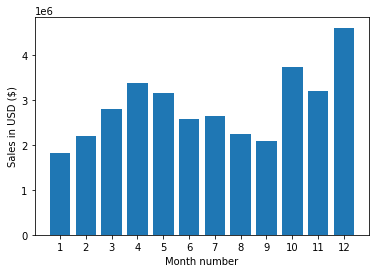

In [49]:
months=range(1,13)
plt.bar(months,sales_by_month)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### December month has the most sales compared to other

##### Which city has max order

In [52]:
def state(x):
    return x.split(',')[1]

In [53]:
all_files['state']=all_files['Purchase Address'].apply(state)

In [57]:
all_files.groupby('state')['state'].count()

state
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: state, dtype: int64

In [59]:
TotalQuantity_orders_bystate = all_files.groupby('state')['Quantity Ordered'].sum()
TotalQuantity_orders_bystate

state
 Atlanta          16602
 Austin           11153
 Boston           22528
 Dallas           16730
 Los Angeles      33289
 New York City    27932
 Portland         14053
 San Francisco    50239
 Seattle          16553
Name: Quantity Ordered, dtype: int32

In [45]:
all_data.groupby('city')['city'].count().index

Index([' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles',
       ' New York City', ' Portland', ' San Francisco', ' Seattle'],
      dtype='object', name='city')

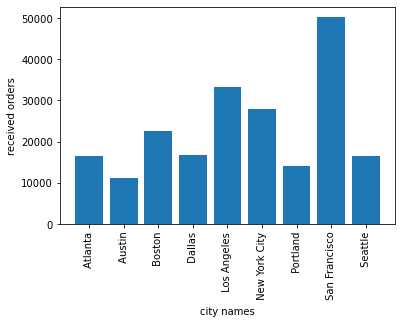

In [60]:
plt.bar(all_files.groupby('state')['state'].count().index,TotalQuantity_orders_bystate)
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

##### What time should we display advertisements to maximise for product purchase?

In [64]:
all_files['Order Date'].dtype

dtype('O')

In [65]:
all_files['Hour'] = pd.to_datetime(all_files['Order Date']).dt.hour

In [66]:
all_files['Hour']

0         8
2        22
3        14
4        14
5         9
         ..
11681    20
11682    16
11683     7
11684    17
11685     0
Name: Hour, Length: 185950, dtype: int64

In [74]:
k1 = all_files.groupby('Hour')['Quantity Ordered'].sum()
k1

Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int32

In [100]:
hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

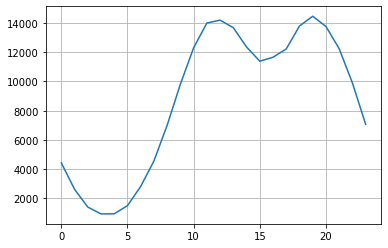

In [101]:
plt.grid()
plt.plot(hours,k1)

##### between 10am and 9pm is probably the best time to advertise to maximise product purchase

#### What product sold the most? &  Why?

<AxesSubplot:xlabel='Product'>

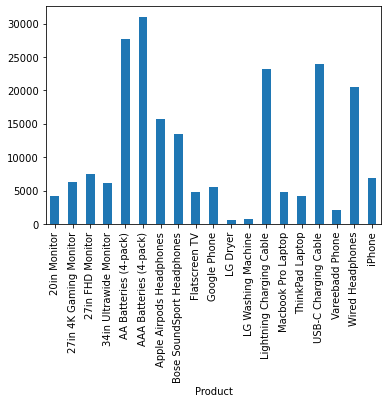

In [102]:
all_files.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [103]:
all_files.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [104]:
products=all_files.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_files.groupby('Product')['Quantity Ordered'].sum()
prices=all_files.groupby('Product')['Price Each'].mean()

<ipython-input-105-0607f60484be>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

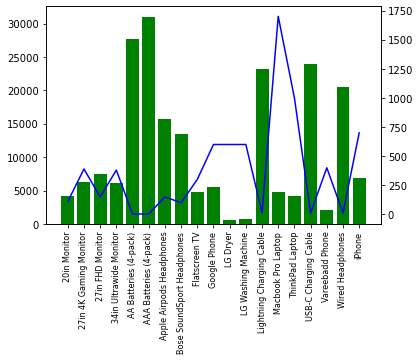

In [105]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax1.bar(products, quantity, color='g')
ax2=ax1.twinx()
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

##### The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa.

In [106]:
all_files.shape

(185950, 10)

##### What products are most often sold together?

#### note: keep orders that have same order Id,are sold mostly together

In [107]:
df=all_files[all_files['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,state,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco,17
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City,11


In [108]:
#create grouped col 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-108-aeb0538e83e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [109]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,state,Hour,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [110]:
df.shape

(14649, 11)

In [111]:
# drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Grouped'>

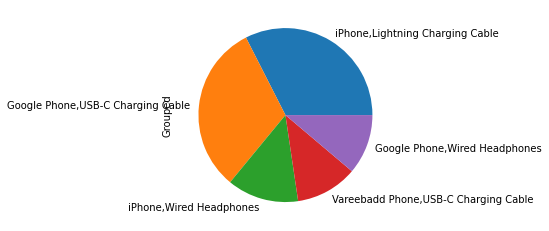

In [112]:
df2['Grouped'].value_counts()[0:5].plot.pie()